# PROJET 7 - Mission 4

In [1]:
#import librairies

library(ggplot2)
options(repr.plot.width=6, repr.plot.height=4)

library(tidyr)
library(tidyverse)
library(dplyr)
library(car)
library(lmtest)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v purrr   0.3.2       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:purrr':

    some

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



### On importe l'échantillon crée lors de la mission 3 

In [2]:
#import data (fichier final_sample.csv)
data <- read.csv("donnees/final_sample.csv", sep=",", header=TRUE, stringsAsFactors = FALSE)

#ajout index
rownames(data) <- seq(nrow(data))

#supression colonne c_i_child
data$c_i_child <- NULL

tail(data)

,m_j,G_j,c_i_parents,country,income_child,income_parents
5799995,9602,63,100,ZAF,21714.89,82408.55
5799996,9602,63,100,ZAF,24553.57,82408.55
5799997,9602,63,100,ZAF,28858.03,82408.55
5799998,9602,63,100,ZAF,35750.29,82408.55
5799999,9602,63,100,ZAF,46297.32,82408.55
5800000,9602,63,100,ZAF,82408.55,82408.55


## MODELE 1  : revenu ~ pays

Warning message:
"Removed 18500 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 18500 rows containing non-finite values (stat_boxplot)."

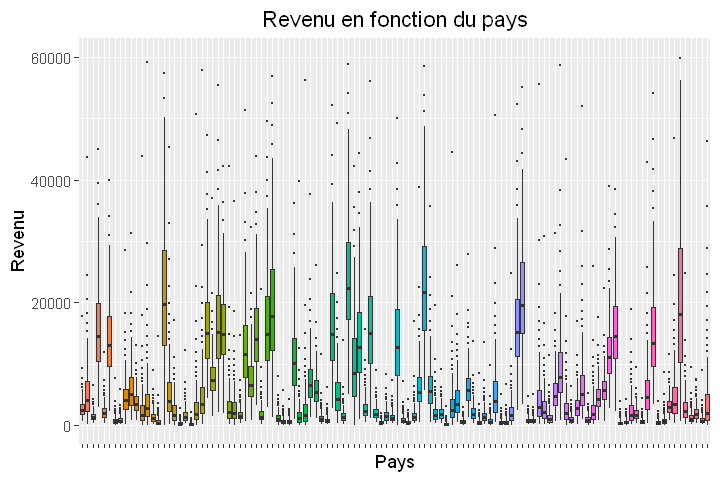

In [3]:
#affichage boxplot du revenu vs pays

ggplot(data,aes(x=country,y=income_child, fill = country))+
  geom_boxplot(outlier.size = 0.1)+
  ggtitle("Revenu en fonction du pays")+
  xlab("Pays")+ ylab("Revenu") +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none", axis.text.x = element_blank()) +
  ylim(0,60000)
ggsave("graphiques/boxplot_revenus_par_pays.png", width = 11, height = 8)

In [3]:
#création df sans les 499 clones - 11600 lignes
data1 <- data[, c('income_child','country', 'G_j','m_j')]
data1 <- data1[!duplicated(data1), ]

### 1) Régression linéaire

In [4]:
#ANOVA avec une seule variable, income_child ~ country

#modelisation
anova_pays <- lm(income_child~country,data=data1)
summary(anova_pays)


Call:
lm(formula = income_child ~ country, data = data1)

Residuals:
   Min     1Q Median     3Q    Max 
-24840  -1787   -385    469 151425 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2994.83     671.39   4.461 8.25e-06 ***
countryARG   2853.05     949.49   3.005 0.002663 ** 
countryARM  -1366.45     949.49  -1.439 0.150138    
countryAUT  13642.77     949.49  14.369  < 2e-16 ***
countryAZE   -637.40     949.49  -0.671 0.502037    
countryBEL  12029.78     949.49  12.670  < 2e-16 ***
countryBFA  -2076.88     949.49  -2.187 0.028736 *  
countryBGD  -1996.14     949.49  -2.102 0.035546 *  
countryBGR   1990.15     949.49   2.096 0.036102 *  
countryBIH   3339.86     949.49   3.518 0.000437 ***
countryBLR    926.33     949.49   0.976 0.329277    
countryBOL     21.43     949.49   0.023 0.981990    
countryBRA   1812.65     949.49   1.909 0.056276 .  
countryBTN  -1478.90     949.49  -1.558 0.119362    
countryCAF  -2183.53     949.49  -2.300 0.021484

### Analyse :

- R2 ajusté égal à 0.49

- Test de Fisher : pvalue nettement inférieure au seuil de 5%

- Il y a une relation significative entre le revenu de l'individu et le pays de l'individu, mais le coefficient de détermination du modèle n'est pas très élevé : modèle peu performant

In [6]:
#affichage ANOVA
anova(anova_pays)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
country,115,510237523813,4436848033,98.42927,0
Residuals,11484,517658643606,45076510,NA,NA


### 2) Analyse de la performance du modèle

In [6]:
n <- dim(data1)[1] #nombre d'individus
p <- 1 #nombre de variables explicatives

#création d'un df regroupant pour chaque individus les leviers, les résidus studentisés et les distances de Cook
analyses1 <- data.frame(obs=1:n)

### Atypicité et influence

In [53]:
#Calcul des leviers
#Pas de leviers ici puisque le modèle n'a qu'une variable explicative qui est qualitative

In [14]:
#calcul des residus studentisés
alpha = 0.05 #seuil alpha
analyses1$rstudent <- rstudent(anova_pays)
seuil_rstudent <- qt(1-alpha/2,n-p-1)

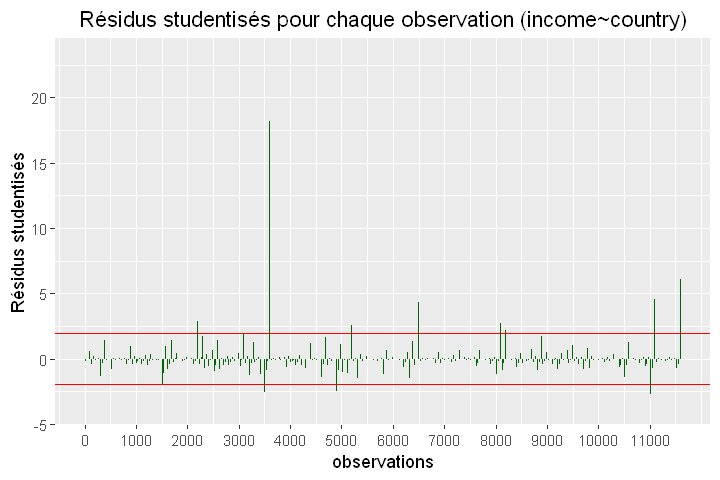

In [15]:
#plot residus studentisés

ggplot(data=analyses1,aes(x=obs,y=rstudent))+
  geom_bar(stat="identity",fill="darkgreen", width = 0.5)+
  geom_hline(yintercept=-seuil_rstudent,col="red")+
  geom_hline(yintercept=seuil_rstudent,col="red")+
  ggtitle('Résidus studentisés pour chaque observation (income~country)') +
  xlab("observations")+
  ylab("Résidus studentisés")+
  scale_x_continuous(breaks=seq(0,n,by=1000)) +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")

In [16]:
# calcul des distances de Cook
influence <- influence.measures(anova_pays)
names(influence)
colnames(influence$infmat)

analyses1$dcook <- influence$infmat[,"cook.d"]
seuil_dcook <- 4/(n-p)

[1] "infmat" "is.inf" "call"

[1] "dfb.1_"   "dfb.cARG" "dfb.cARM" "dfb.cAUT" "dfb.cAZE" "dfb.cBEL"
  [7] "dfb.cBFA" "dfb.cBGD" "dfb.cBGR" "dfb.cBIH" "dfb.cBLR" "dfb.cBOL"
 [13] "dfb.cBRA" "dfb.cBTN" "dfb.cCAF" "dfb.cCAN" "dfb.cCHL" "dfb.cCHN"
 [19] "dfb.cCIV" "dfb.cCMR" "dfb.cCOD" "dfb.cCOL" "dfb.cCRI" "dfb.cCYP"
 [25] "dfb.cCZE" "dfb.cDEU" "dfb.cDNK" "dfb.cDOM" "dfb.cECU" "dfb.cEGY"
 [31] "dfb.cESP" "dfb.cEST" "dfb.cFIN" "dfb.cFJI" "dfb.cFRA" "dfb.cGBR"
 [37] "dfb.cGEO" "dfb.cGHA" "dfb.cGIN" "dfb.cGRC" "dfb.cGTM" "dfb.cHND"
 [43] "dfb.cHRV" "dfb.cHUN" "dfb.cIDN" "dfb.cIND" "dfb.cIRL" "dfb.cIRN"
 [49] "dfb.cIRQ" "dfb.cISL" "dfb.cISR" "dfb.cITA" "dfb.cJOR" "dfb.cJPN"
 [55] "dfb.cKAZ" "dfb.cKEN" "dfb.cKGZ" "dfb.cKHM" "dfb.cKOR" "dfb.cLAO"
 [61] "dfb.cLBR" "dfb.cLKA" "dfb.cLTU" "dfb.cLUX" "dfb.cLVA" "dfb.cMAR"
 [67] "dfb.cMDA" "dfb.cMDG" "dfb.cMEX" "dfb.cMKD" "dfb.cMLI" "dfb.cMNE"
 [73] "dfb.cMNG" "dfb.cMOZ" "dfb.cMRT" "dfb.cMWI" "dfb.cMYS" "dfb.cNER"
 [79] "dfb.cNGA" "dfb.cNIC" "dfb.cNLD" "dfb.cNOR" "dfb.cNPL" "dfb.cPAK"
 [85] "dfb.cPAN" "dfb.cPER" "dfb.cPHL" "dfb.cPOL" "dfb.cPRT" "dfb.cPRY"
 [91] "dfb.cPSE" "dfb.cROU" "dfb.cRUS" "dfb.cSDN" "dfb.cSLV" "dfb.cSRB"
 [97] "dfb.cSVK" "dfb.cSVN" "dfb.cSWE" "dfb.cSWZ" "dfb.cSYR" "dfb.cTHA"
[103] "dfb.cTJK" "dfb.cTLS" "dfb.cTUR" "dfb.cTWN" "dfb.cTZA" "dfb.cUGA"
[109] "dfb.cUKR" "dfb.cURY" "dfb.cUSA" "dfb.cVEN" "dfb.cVNM" "dfb.cXKX"
[115] "dfb.cYEM" "dfb.cZAF" "dffit"    "cov.r"    "cook.d"   "hat"

Warning message:
"Removed 15 rows containing missing values (position_stack)."

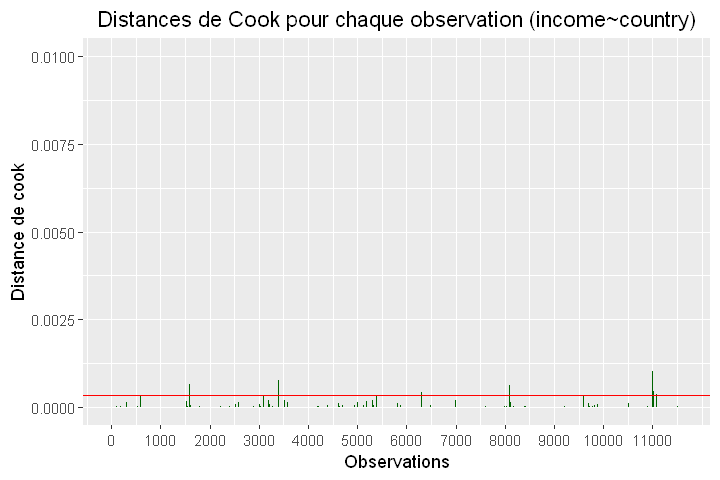

In [18]:
#plot distances de cook

ggplot(data=analyses1,aes(x=obs,y=dcook))+
  geom_bar(stat="identity",fill="darkgreen", width = 0.5)+
  geom_hline(yintercept=seuil_dcook,col="red")+
  ggtitle('Distances de Cook pour chaque observation (income~country)') +
  xlab("Observations")+
  ylab("Distance de cook")+
  scale_x_continuous(breaks=seq(0,n,by=1000)) +
  ylim(0,0.01) +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")

In [19]:
#on selectionne les observations qui dépassent les 3 seuils : observations atypiques ET influentes
obs_influentes_pays <- analyses1[(analyses1$leviers > seuil_levier) &
               (abs(analyses1$rstudent) > seuil_rstudent) &
               (abs(analyses1$dcook) > seuil_dcook),]

#affichage des individus atypiques et influents
head(data1[as.numeric(rownames(obs_influentes_pays)),])

,income_child,country,G_j,m_j
100,17754.3240,ALB,33.2,7297
50098,20528.3050,ARG,41.4,13220
50099,24444.9500,ARG,41.4,13220
50100,43669.2420,ARG,41.4,13220
150001,2958.0764,AUT,29.7,36193
150094,30725.9300,AUT,29.7,36193
150095,32304.8070,AUT,29.7,36193
150096,33914.1050,AUT,29.7,36193
150097,36080.9020,AUT,29.7,36193
150098,39450.5550,AUT,29.7,36193


###  Colinéarité

In [20]:
#colinéarité des variables
#une seule variable pour ce modèle

### Homoscédasticité des résidus

In [21]:
#homoscédasticité des résidus (h0 : il y A homoscedasticité)
bptest(anova_pays)


	studentized Breusch-Pagan test

data:  anova_pays
BP = 424.61, df = 115, p-value < 2.2e-16


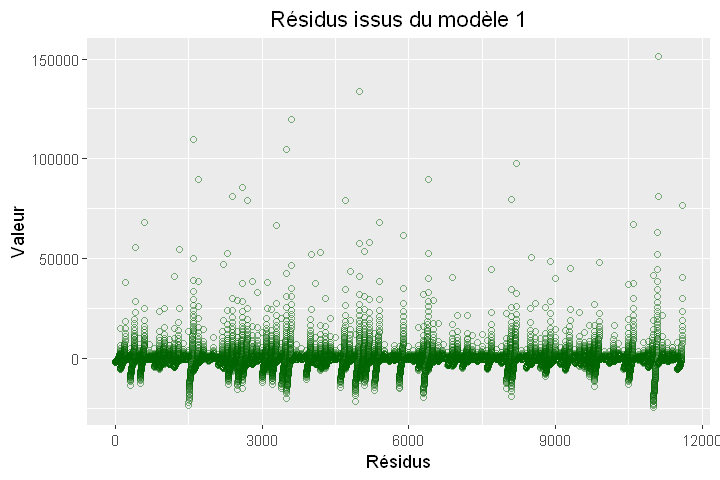

In [14]:
#affichage des résidus
df <- data.frame(y = anova_pays$residuals)
ggplot(df, aes(x = seq(length(anova_pays$residuals)), y)) +
  geom_point(color="darkgreen", alpha = 0.5, shape = 1) +
  ggtitle('Résidus issus du modèle 1') +
  xlab("Résidus")+
  ylab("Valeur")+
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")
ggsave("graphiques/dispersion_residus.png", width = 11, height = 8)

### Normalité des résidus

In [5]:
#test de normalité des résidus
ks.test(anova_pays$residuals,"pnorm",mean(anova_pays$residuals),sd(anova_pays$residuals))


	One-sample Kolmogorov-Smirnov test

data:  anova_pays$residuals
D = 0.24661, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message:
"Removed 106 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."Warning message:
"Removed 106 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

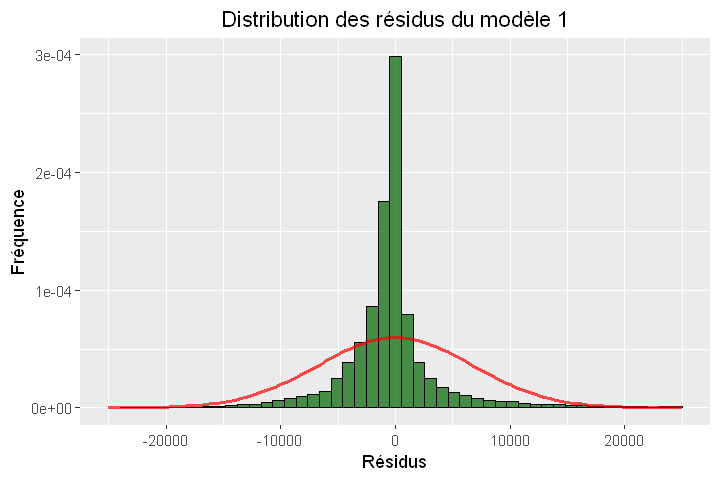

In [13]:
#Affichage de la distribution des résidus
df <- data.frame(x = anova_pays$residuals)

ggplot(df, aes(x)) +
  geom_histogram(aes(y = stat(density)), , bins = 50, colour="black", fill="darkgreen", alpha = 0.7) +
  stat_function(
    fun = dnorm, 
    args = list(mean = mean(df$x), sd = sd(df$x)), 
    lwd = 1, alpha = 0.7, 
    col = 'red'
  ) +
  ggtitle('Distribution des résidus du modèle 1') +
  xlab("Résidus")+
  ylab("Fréquence")+
  xlim(-25000, 25000) +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")

ggsave("graphiques/distrib_residus.png", width = 11, height = 8)

## MODELE 2 : revenu ~ Gini + revenu moyen

### 1) Régression sans logarithme

In [7]:
#Régression linéaire : income_child ~ G_j*m_j

#regression
anova_gini_mj <- lm(income_child~G_j*m_j,data=data1)
summary(anova_gini_mj)


Call:
lm(formula = income_child ~ G_j * m_j, data = data1)

Residuals:
   Min     1Q Median     3Q    Max 
-29309  -2227   -499    524 156347 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.795e+02  4.832e+02  -0.578    0.563    
G_j          1.155e+01  1.253e+01   0.922    0.357    
m_j          5.158e-01  3.307e-02  15.596   <2e-16 ***
G_j:m_j     -1.077e-03  9.811e-04  -1.098    0.272    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6995 on 11596 degrees of freedom
Multiple R-squared:  0.448,	Adjusted R-squared:  0.4479 
F-statistic:  3137 on 3 and 11596 DF,  p-value: < 2.2e-16


### Analyse :

- G_j et interaction G_j:m_j non significatifs
- En revanche, la variable m_j est significative (pvalue <<< 5%)
- Test de Fisher : pvalue <<< 5%
- Coefficient de détermination : 0.4479

### 2) Régression avec logarithme

In [24]:
#regression en utilisant le logarithme du revenu

data1$income_child_ln <- log(data1$income_child)
data1$m_j_ln <- log(data1$m_j)

anova_gini_mj_ln <- lm(income_child_ln~G_j*m_j_ln,data=data1)
summary(anova_gini_mj_ln)


Call:
lm(formula = income_child_ln ~ G_j * m_j_ln, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0360 -0.4848  0.0046  0.4951  3.8308 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.8307647  0.2818860  -6.495 8.66e-11 ***
G_j          0.0585040  0.0075156   7.784 7.60e-15 ***
m_j_ln       1.1784119  0.0316305  37.256  < 2e-16 ***
G_j:m_j_ln  -0.0088260  0.0008587 -10.279  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8067 on 11596 degrees of freedom
Multiple R-squared:  0.6589,	Adjusted R-squared:  0.6589 
F-statistic:  7468 on 3 and 11596 DF,  p-value: < 2.2e-16


### Analyse : 

- La regression en utilisant le logarithme du revenu est plus performante : R² = 0.659 contre 0.448 précedemment

- Les paramètres des 2 variables, ainsi que l'interaction G_j:m_j sont significatifs

- On utilisera ce modèle pour répondre aux questions suivantes

In [39]:
#ANOVA 2 facteurs
anova_gini_mj <- anova_gini_mj_ln
anova(anova_gini_mj)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
G_j,1,2591.60776,2.591608e+03,3982.6194,0.000000e+00
m_j_ln,1,11918.81880,1.191882e+04,18316.0894,0.000000e+00
G_j:m_j_ln,1,68.74837,6.874837e+01,105.6482,1.123625e-24
Residuals,11596,7545.85873,6.507295e-01,NA,NA


## MODELE 3 : revenu ~ Gini + revenu moyen + classe parents

### 1) Régression sans logarithme

In [3]:
#REGRESSION LINEAIRE : income_child ~ G_j*m_j*c_i_parents

#regression
anova_final <- lm(income_child~G_j*m_j*c_i_parents,data=data)
summary(anova_final)


Call:
lm(formula = income_child ~ G_j * m_j * c_i_parents, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-40244  -2010   -397    545 167958 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.142e+03  4.117e+01  -27.75   <2e-16 ***
G_j                  2.119e+01  1.067e+00   19.86   <2e-16 ***
m_j                  8.489e-01  2.818e-03  301.24   <2e-16 ***
c_i_parents          1.747e+01  7.205e-01   24.24   <2e-16 ***
G_j:m_j             -1.548e-02  8.359e-05 -185.21   <2e-16 ***
G_j:c_i_parents     -1.943e-01  1.868e-02  -10.40   <2e-16 ***
m_j:c_i_parents     -6.758e-03  4.933e-05 -136.98   <2e-16 ***
G_j:m_j:c_i_parents  2.922e-04  1.463e-06  199.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6737 on 5799992 degrees of freedom
Multiple R-squared:  0.4878,	Adjusted R-squared:  0.4878 
F-statistic: 7.891e+05 on 7 and 5799992 DF,  p-value: < 2.2e-16


### 2) Régression avec logarithme

In [5]:
#regression en utilisant le logarithme du revenu

rm(anova_final) #on efface le modele precedent

#ajout colonnes logarithme revenu
data$income_child_ln <- log(data$income_child)
data$m_j_ln <- log(data$m_j)

#regression
anova_final <- lm(income_child_ln~G_j*m_j_ln*c_i_parents,data=data)
summary(anova_final)

Warning message in rm(anova_final):
"objet 'anova_final' introuvable"


Call:
lm(formula = income_child_ln ~ G_j * m_j_ln * c_i_parents, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3169 -0.4497  0.0045  0.4597  5.0086 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3.806e+00  2.268e-02 -167.78   <2e-16 ***
G_j                     9.271e-02  6.047e-04  153.32   <2e-16 ***
m_j_ln                  1.449e+00  2.545e-03  569.39   <2e-16 ***
c_i_parents             4.003e-02  3.971e-04  100.82   <2e-16 ***
G_j:m_j_ln             -1.565e-02  6.909e-05 -226.50   <2e-16 ***
G_j:c_i_parents        -6.925e-04  1.058e-05  -65.42   <2e-16 ***
m_j_ln:c_i_parents     -5.493e-03  4.456e-05 -123.28   <2e-16 ***
G_j:m_j_ln:c_i_parents  1.383e-04  1.209e-06  114.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7339 on 5799992 degrees of freedom
Multiple R-squared:  0.7176,	Adjusted R-squared:  0.7176 
F-statistic: 2.106e+06 on 7 an

### Analyse :

- La regression utilisant le logarithme des variables de revenu est encore une fois plus performante 

- L'ajout de la variable 'classe de revenu des parents' améliore le pouvoir explicatif du modèle : R² = 0.718 contre 0.659 pour le modèle précedent

- Les paramètres de toutes les variables, ainsi que ceux de leurs interactions sont tous significatifs 

- La p-value du test de Fisher est bien inférieure au seuil de 5%



- Selon ce modèle, 72% de la variance totale du revenu des enfants est expliquée par le pays de naissance et la classe de revenu des parents

In [4]:
#ANOVA 3 facteurs
anova(anova_final)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
G_j,1,1295803.879,1.295804e+06,2405800.464,0
m_j_ln,1,5959409.399,5.959409e+06,11064289.998,0
c_i_parents,1,558997.464,5.589975e+05,1037839.429,0
G_j:m_j_ln,1,34420.557,3.442056e+04,63905.499,0
G_j:c_i_parents,1,81176.378,8.117638e+04,150712.751,0
m_j_ln:c_i_parents,1,1696.539,1.696539e+03,3149.809,0
G_j:m_j_ln:c_i_parents,1,7041.092,7.041092e+03,13072.551,0
Residuals,5799992,3123971.520,5.386165e-01,NA,NA


## 3) Analyse de la performance du modèle

In [5]:
n <- dim(data)[1] #nombre d'individus
p <- 3 #nombre de variables explicatives

#création d'un df regroupant pour chaque individus les leviers, les résidus studentisés et les distances de Cook
analyses <- data.frame(obs=1:n)

### Atypicité et influence

#### Leviers :

In [6]:
#Calcul des leviers - on calcule les leviers en 2 fois pour parer aux problèmes de memoire saturée
leviers1 <- hat(model.matrix(anova_final)[1:2600000,])
leviers2 <- hat(model.matrix(anova_final)[2600001:5800000,])
analyses$leviers <- c(leviers1,leviers2)
seuil_levier <- 2*p/n

rm(leviers1)
rm(leviers2)

Warning message:
"Removed 6033 rows containing missing values (position_stack)."Warning message:
"Removed 6033 rows containing missing values (position_stack)."

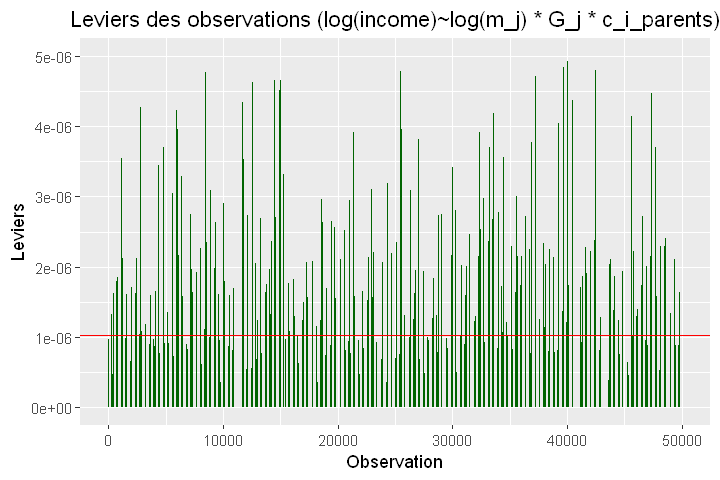

In [13]:
#plot leviers (seulement un echantillon)

ggplot(data=analyses[sample(rownames(analyses),50000),], aes(x=seq(50000),y=leviers)) + #on selectionne 50000 lignes de l'échantillon à afficher
   geom_bar(stat="identity",fill="darkgreen", width = 0.5)+
   geom_hline(yintercept=seuil_levier,col="red")+
   ggtitle('Leviers des observations (log(income)~log(m_j) * G_j * c_i_parents)') +
   xlab("Observation")+
   ylab("Leviers")+
   ylim(0, 0.000005) +
   scale_x_continuous(breaks=seq(0,n,by=10000)) +
   theme(plot.title = element_text(hjust = 0.5), legend.position = "none")
ggsave("graphiques/leviers_residus.png", width = 11, height = 8)

#### Résidus studentisés :

In [14]:
#calcul des residus studentisés
alpha = 0.05 #seuil alpha
analyses$rstudent <- rstudent(anova_final)
seuil_rstudent <- qt(1-alpha/2,n-p-1)

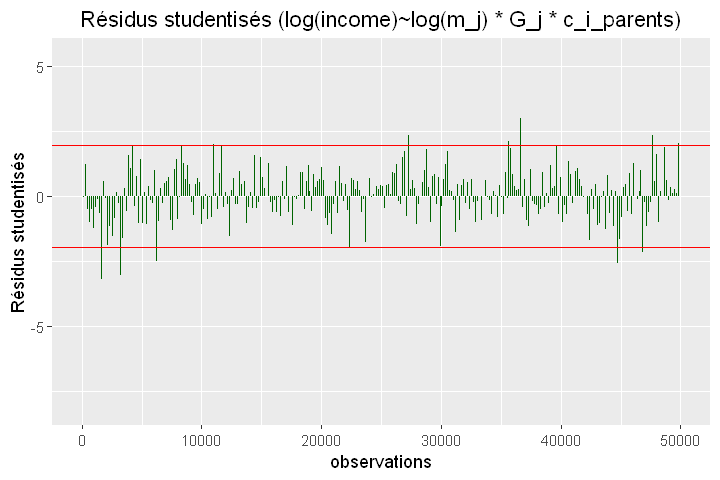

In [15]:
#plot residus studentisés

ggplot(data=analyses[sample(rownames(analyses),50000),],aes(x=seq(50000),y=rstudent))+
  geom_bar(stat="identity",fill="darkgreen", width = 0.5)+
  geom_hline(yintercept=-seuil_rstudent,col="red")+
  geom_hline(yintercept=seuil_rstudent,col="red")+
  ggtitle('Résidus studentisés (log(income)~log(m_j) * G_j * c_i_parents)') +
  xlab("observations")+
  ylab("Résidus studentisés")+
  scale_x_continuous(breaks=seq(0,n,by=10000)) +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")
ggsave("graphiques/residus_studentisés.png", width = 11, height = 8)

#### Distances de Cook

In [16]:
# calcul des distances de Cook
seuil_dcook <- 4/(n-p)

#pour ce modèle on a calculé les distances de Cook séparemment sur un notebook python 
#(problème de mémoire saturée saturée sur R) 
#On importe le fichier csv des distances de Cook du modèle
dcook <- read.csv("donnees/dcook.csv", skip = 1, sep=",", header=FALSE, stringsAsFactors = FALSE)

analyses$dcook <- dcook[,1]
rm(dcook) # on efface l'objet dcook

Warning message:
"Removed 145 rows containing missing values (position_stack)."

ERROR: Error: Cannot add ggproto objects together. Did you forget to add this object to a ggplot object?


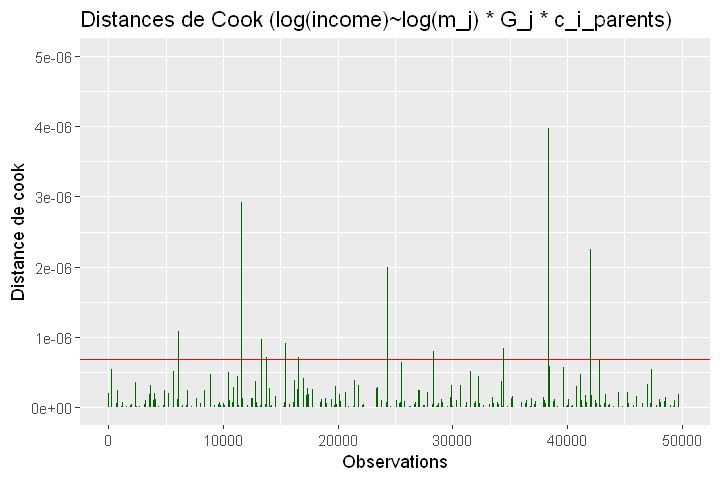

In [18]:
#plot distances de cook

ggplot(data=analyses[sample(rownames(analyses),50000),],aes(x=seq(50000),y=dcook))+
  geom_bar(stat="identity",fill="darkgreen", width = 0.5)+
  geom_hline(yintercept=seuil_dcook,col="red")+
  ggtitle('Distances de Cook (log(income)~log(m_j) * G_j * c_i_parents)') +
  xlab("Observations")+
  ylab("Distance de cook")+
  ylim(0, 0.000005)
  scale_x_continuous(breaks=seq(0,n,by=10000)) +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")
ggsave("graphiques/distances_cook.png", width = 11, height = 8)

In [23]:
#5 individus avec la distance de Cook la plus élevée
top_dcook <-head(analyses[order(analyses$dcook, decreasing = TRUE),])

data[rownames(top_dcook),]

,m_j,G_j,c_i_parents,country,income_child,income_parents,income_child_ln,m_j_ln
700100,685,56.2,1,CAF,14472.95,40.92813,9.580037,6.529419
700200,685,56.2,2,CAF,14472.95,62.71471,9.580037,6.529419
700300,685,56.2,3,CAF,14472.95,79.51492,9.580037,6.529419
700400,685,56.2,4,CAF,14472.95,91.46294,9.580037,6.529419
700500,685,56.2,5,CAF,14472.95,100.00194,9.580037,6.529419
700600,685,56.2,6,CAF,14472.95,106.96217,9.580037,6.529419


### Modélisation sans les outliers

In [8]:
#on selectionne les observations qui dépassent les 3 seuils : observations atypiques ET influentes
obs_influentes_pays <- analyses[(analyses$leviers > seuil_levier) &
               (abs(analyses$rstudent) > seuil_rstudent) &
               (analyses$dcook > seuil_dcook),]

#nombre d'observations atypiques et influentes
count(data[as.numeric(rownames(obs_influentes_pays)),])

n
171271


In [35]:
#affichage des observations atypiques et influentes
head(data[as.numeric(rownames(obs_influentes_pays)),])

,m_j,G_j,c_i_parents,country,income_child,income_parents
100,7297,33.2,1,ALB,17754.32,728.8980
200,7297,33.2,2,ALB,17754.32,916.6623
300,7297,33.2,3,ALB,17754.32,1010.9160
400,7297,33.2,4,ALB,17754.32,1086.9078
500,7297,33.2,5,ALB,17754.32,1132.6997
600,7297,33.2,6,ALB,17754.32,1171.1412


In [9]:
#modélisation en excluant les valeurs atypiques et influentes
anova_final_sans_outliers <- lm(income_child_ln~G_j*m_j_ln*c_i_parents,data=data[-as.numeric(rownames(obs_influentes_pays)),])
summary(anova_final_sans_outliers)


Call:
lm(formula = income_child_ln ~ G_j * m_j_ln * c_i_parents, data = data[-as.numeric(rownames(obs_influentes_pays)), 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1411 -0.4319  0.0062  0.4441  3.6121 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3.929e+00  2.089e-02 -188.07   <2e-16 ***
G_j                     9.349e-02  5.592e-04  167.18   <2e-16 ***
m_j_ln                  1.454e+00  2.345e-03  620.34   <2e-16 ***
c_i_parents             4.057e-02  3.662e-04  110.77   <2e-16 ***
G_j:m_j_ln             -1.542e-02  6.393e-05 -241.20   <2e-16 ***
G_j:c_i_parents        -7.107e-04  9.805e-06  -72.49   <2e-16 ***
m_j_ln:c_i_parents     -5.497e-03  4.110e-05 -133.74   <2e-16 ***
G_j:m_j_ln:c_i_parents  1.371e-04  1.121e-06  122.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6568 on 5628721 degrees of freedom
Multiple R-squared:  0.7608,	Adjusted

- En supprimant les observations atypiques et influentes de l'échantillon , le nouveau modèle a un R² ajusté de 0.76 (0.718 avec les outliers)

###  Colinéarité des variables

In [11]:
#colinéarité des variables
vif(anova_final)

G_j                 m_j_ln            c_i_parents 
              233.3660               107.4627              1416.8096 
            G_j:m_j_ln        G_j:c_i_parents     m_j_ln:c_i_parents 
              239.8690              1619.4316              1483.5956 
G_j:m_j_ln:c_i_parents 
             1610.1421

In [12]:
#colinéarité des variables sans interaction
anova_final_sans_interaction <- lm(income_child_ln~G_j+m_j_ln+c_i_parents,data=data)
vif(anova_final_sans_interaction)

G_j      m_j_ln c_i_parents 
   1.108509    1.108509    1.000000

- Il n'y a pas de problèmes de colinéarité entre les variables, puisque les variance inflation factors sont très proches de 1

### Homoscédasticité des résidus

In [4]:
#homoscédasticité des résidus (h0 : il y A homoscedasticité)
bptest(anova_final)


	studentized Breusch-Pagan test

data:  anova_final
BP = 169305, df = 7, p-value < 2.2e-16


- La p-value du test d'homoscédasticité est inférieur au seuil de 5%, on rejette donc l'hypothèse nulle d'homoscédasticité des résidus à ce seuil. On peut donc considérer que les résidus du modèle n'ont pas une variance constante.

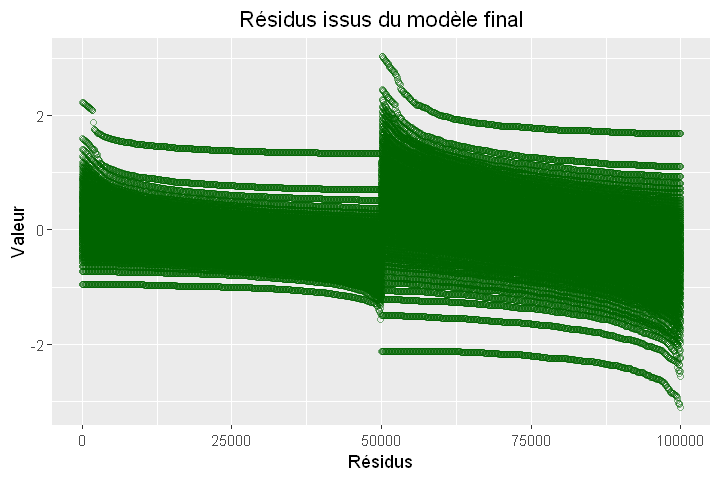

In [10]:
#affichage des résidus
#df <- data.frame(y = sample(anova_final$residuals,50000))
df <- data.frame(y = anova_final$residuals[1:100000]) # 100 000 premières lignes, soit 2 pays différents
ggplot(df, aes(x = seq(100000), y)) +
  geom_point(color="darkgreen", alpha = 0.5, shape = 1) +
  ggtitle('Résidus issus du modèle final') +
  xlab("Résidus")+
  ylab("Valeur")+
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")
ggsave("graphiques/dispersion_residus.png", width = 11, height = 8)

- On observe bien que la variance des résidus n'est pas la même d'un pays à l'autre ( et varie pour les individus d'un même pays)

### Normalité des résidus

In [20]:
#test de normalité des résidus
ks.test(anova_final$residuals,"pnorm",mean(anova_final$residuals),sd(anova_final$residuals))


	One-sample Kolmogorov-Smirnov test

data:  unique(anova_final$residuals)
D = 0.016325, p-value < 2.2e-16
alternative hypothesis: two-sided


- On rejette l'hypothèse de normalité des résidus au seuil 5% selon le test de Kolmogorov-Smirnov

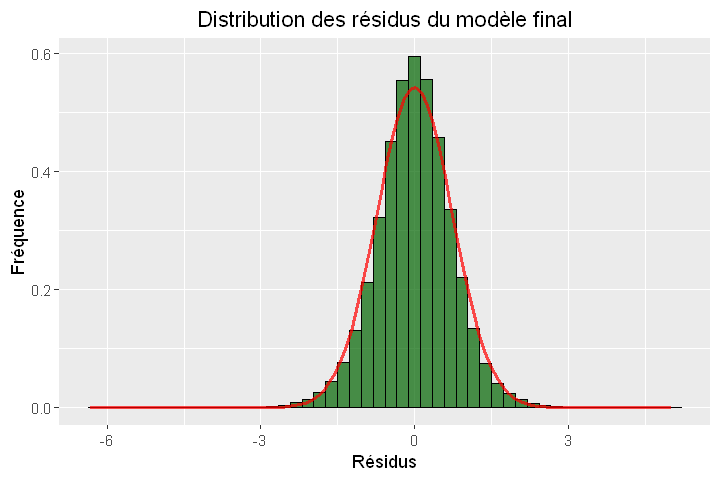

In [11]:
#Affichage de la distribution des résidus
df <- data.frame(x = anova_final$residuals)

ggplot(df, aes(x)) +
  geom_histogram(aes(y = stat(density)), , bins = 50, colour="black", fill="darkgreen", alpha = 0.7) +
  stat_function(
    fun = dnorm, 
    args = list(mean = mean(df$x), sd = sd(df$x)), 
    lwd = 1, alpha = 0.7, 
    col = 'red'
  ) +
  ggtitle('Distribution des résidus du modèle final') +
  xlab("Résidus")+
  ylab("Fréquence")+
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")

ggsave("graphiques/distrib_residus.png", width = 11, height = 8)

- On constate néanmoins que la distribution des résidus est cohérente avec une distribution normale, ce qui nous permet de valider le modèle